In [1]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install --upgrade xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 192.9 MB 57 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [3]:
pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!ls "/content/drive/My Drive/MS"

cachedir	  diemso.csv  houses_prices.csv		 pima.joblib.dat
dermatology.data  Fold1       incomee.csv		 pima.pickle.dat
diemsinh.csv	  Fold2       pima-indians-diabetes.csv


In [7]:
import os
import cv2
import pandas as pd
import numpy as np
os.getcwd()
os.chdir("/content/drive/My Drive/MS")

In [8]:
# First XGBoost model for Pima Indians dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# load data

dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")
dataset = pd.DataFrame(dataset)
dataset
# split data into X and y

X = dataset.iloc[:,0:8]
Y = dataset.iloc[:,8]
# split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(type(X_train))

# fit model on training data
model = XGBClassifier()
model.fit(X_train, y_train)

# make predictions for test data
predictions = model.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

<class 'pandas.core.frame.DataFrame'>
Accuracy: 73.59%


In [9]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# CV model
kfold = KFold(n_splits=10 , shuffle=False, random_state=None)
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 73.96% (4.77%)


In [10]:
# stratified k-fold cross validation evaluation of XGBoost model
from sklearn.model_selection import StratifiedKFold

# CV model
kfold = StratifiedKFold(n_splits=10, shuffle=False, random_state=None)
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 73.57% (4.39%)


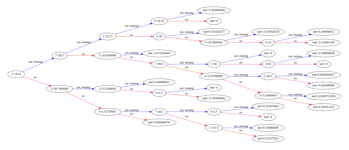

In [11]:
# plot decision tree left to right
from xgboost import plot_tree
from matplotlib import pyplot

# plot single tree
plot_tree(model, num_trees=0, rankdir='LR')
pyplot.show()

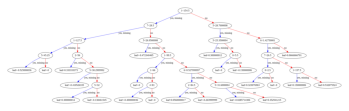

In [12]:
plot_tree(model)
pyplot.show()

In [13]:
# Train XGBoost model, save to file using joblib, load and make predictions

from joblib import dump
from joblib import load

# save model to file
dump(model, "pima.joblib.dat")
print("Saved model to: pima.joblib.dat")

loaded_model = load("pima.joblib.dat")
print("Loaded model from: pima.joblib.dat")
# make predictions for test data

predictions = loaded_model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Saved model to: pima.joblib.dat
Loaded model from: pima.joblib.dat
Accuracy: 73.59%


In [14]:
# Train XGBoost model, save to file using pickle, load and make predictions

import pickle

# save model to file
pickle.dump(model, open("pima.pickle.dat", "wb"))
print("Saved model to: pima.pickle.dat")

# load model from file
loaded_model = pickle.load(open("pima.pickle.dat", "rb"))
print("Loaded model from: pima.pickle.dat")
# make predictions for test data
predictions = loaded_model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Saved model to: pima.pickle.dat
Loaded model from: pima.pickle.dat
Accuracy: 73.59%


In [15]:
# use feature importance for feature selection

from numpy import sort
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

# make predictions for test data and evaluate
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Fit model using each importance as a threshold

thresholds = sort(model.feature_importances_)

for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(model, threshold=thresh, prefit=True)
	select_X_train = selection.transform(X_train)
	# train model
	selection_model = XGBClassifier()
	selection_model.fit(select_X_train, y_train)
	# eval model
	select_X_test = selection.transform(X_test)
	predictions = selection_model.predict(select_X_test)
	accuracy = accuracy_score(y_test, predictions)
	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Accuracy: 73.59%
Thresh=0.074, n=8, Accuracy: 73.59%
Thresh=0.080, n=7, Accuracy: 75.76%
Thresh=0.089, n=6, Accuracy: 70.56%
Thresh=0.101, n=5, Accuracy: 68.83%
Thresh=0.104, n=4, Accuracy: 69.26%
Thresh=0.133, n=3, Accuracy: 68.40%
Thresh=0.142, n=2, Accuracy: 72.73%
Thresh=0.276, n=1, Accuracy: 68.83%


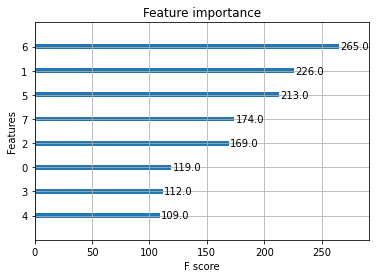

In [16]:

from xgboost import plot_importance
# plot feature importance
plot_importance(model)
pyplot.show()

[0.10414954 0.2764241  0.08880962 0.07448252 0.10096792 0.14167249
 0.08007624 0.13341755]


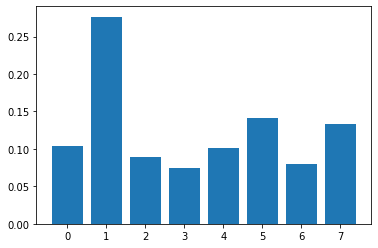

In [17]:
print(model.feature_importances_)
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()